In [5]:
library(HSAUR)

In [6]:
data(heptathlon)

1988 서울 올림픽 육상 여성 7종 경기 결과 데이터 <br>
허들, 높이뛰기, 투포환, 200미터달리기, 멀리뛰기, 창던지기, 800미터달리기, 점수로 이루어져있다.

In [7]:
head(heptathlon)

,hurdles,highjump,shot,run200m,longjump,javelin,run800m,score
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Joyner-Kersee (USA),12.69,1.86,15.80,22.56,7.27,45.66,128.51,7291
John (GDR),12.85,1.80,16.23,23.65,6.71,42.56,126.12,6897
Behmer (GDR),13.20,1.83,14.20,23.10,6.68,44.54,124.20,6858
Sablovskaite (URS),13.61,1.80,15.23,23.92,6.25,42.78,132.24,6540
Choubenkova (URS),13.51,1.74,14.76,23.93,6.32,47.46,127.90,6540
Schulz (GDR),13.75,1.83,13.50,24.65,6.33,42.82,125.79,6411


In [8]:
summary(heptathlon)

    hurdles         highjump          shot          run200m     
 Min.   :12.69   Min.   :1.500   Min.   :10.00   Min.   :22.56  
 1st Qu.:13.47   1st Qu.:1.770   1st Qu.:12.32   1st Qu.:23.92  
 Median :13.75   Median :1.800   Median :12.88   Median :24.83  
 Mean   :13.84   Mean   :1.782   Mean   :13.12   Mean   :24.65  
 3rd Qu.:14.07   3rd Qu.:1.830   3rd Qu.:14.20   3rd Qu.:25.23  
 Max.   :16.42   Max.   :1.860   Max.   :16.23   Max.   :26.61  
    longjump        javelin         run800m          score     
 Min.   :4.880   Min.   :35.68   Min.   :124.2   Min.   :4566  
 1st Qu.:6.050   1st Qu.:39.06   1st Qu.:132.2   1st Qu.:5746  
 Median :6.250   Median :40.28   Median :134.7   Median :6137  
 Mean   :6.152   Mean   :41.48   Mean   :136.1   Mean   :6091  
 3rd Qu.:6.370   3rd Qu.:44.54   3rd Qu.:138.5   3rd Qu.:6351  
 Max.   :7.270   Max.   :47.50   Max.   :163.4   Max.   :7291  

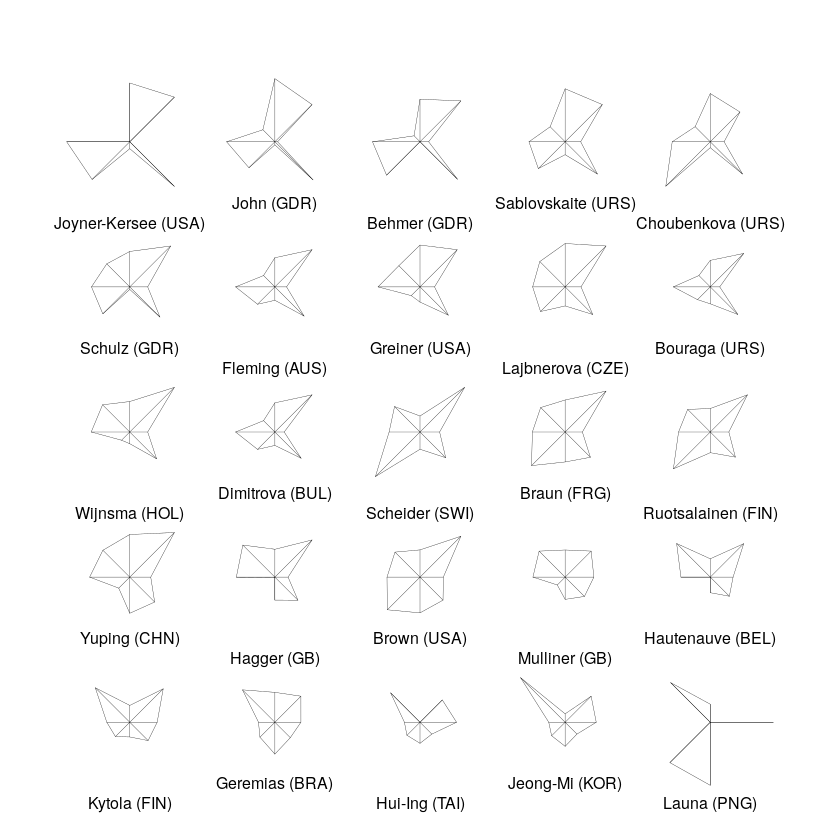

In [9]:
stars(heptathlon)

In [10]:
library(aplpack)

Warning message:
“no DISPLAY variable so Tk is not available”


effect of variables:
 modified item       Var       
 "height of face   " "hurdles" 
 "width of face    " "highjump"
 "structure of face" "shot"    
 "height of mouth  " "run200m" 
 "width of mouth   " "longjump"
 "smiling          " "javelin" 
 "height of eyes   " "run800m" 
 "width of eyes    " "score"   
 "height of hair   " "hurdles" 
 "width of hair   "  "highjump"
 "style of hair   "  "shot"    
 "height of nose  "  "run200m" 
 "width of nose   "  "longjump"
 "width of ear    "  "javelin" 
 "height of ear   "  "run800m" 


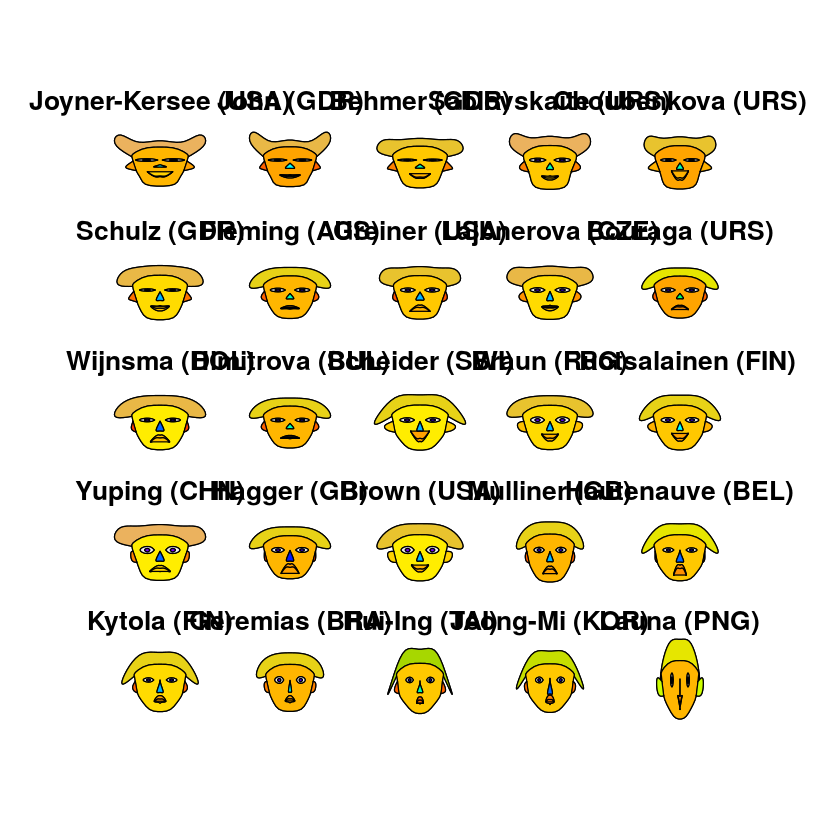

In [11]:
faces(heptathlon, face.type = 1)

육상 기록 중 허들, 200미터 달리기, 800미터 달리기의 값은 값이 작을 수록 좋은 점수이다. 그러므로 자료의 변형이 필요하다. 높은 점수가 좋은 점수가 되도록 최대값에서 각 기록을 빼준다. 이러면 최대값 즉, 기록이 제일 안 좋은 선수는 0으로 시작한다.

In [17]:
heptathlon$hurdles = max(heptathlon$hurdles) - heptathlon$hurdles
heptathlon$run200m = max(heptathlon$run200m) - heptathlon$run200m
heptathlon$run800m = max(heptathlon$run800m) - heptathlon$run800m

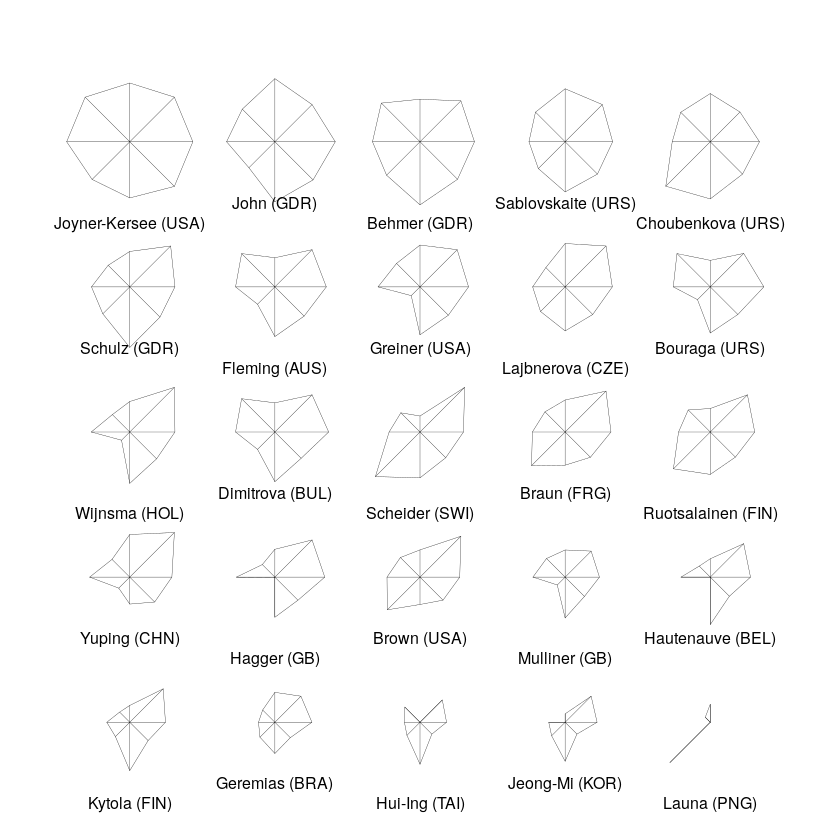

In [18]:
stars(heptathlon)

별그림의 변화를 확인할 수 있다.

In [19]:
hep.data = heptathlon[, -8]

score를 뺀 데이터를 새로 저장한다.

In [20]:
round(cor(hep.data), 2)

,hurdles,highjump,shot,run200m,longjump,javelin,run800m
hurdles,1.00,0.81,0.65,0.77,0.91,0.01,0.78
highjump,0.81,1.00,0.44,0.49,0.78,0.00,0.59
shot,0.65,0.44,1.00,0.68,0.74,0.27,0.42
run200m,0.77,0.49,0.68,1.00,0.82,0.33,0.62
longjump,0.91,0.78,0.74,0.82,1.00,0.07,0.70
javelin,0.01,0.00,0.27,0.33,0.07,1.00,-0.02
run800m,0.78,0.59,0.42,0.62,0.70,-0.02,1.00


창던지기가 유독 다른 종목과 상관계수가 떨어진다.

In [21]:
hep.pca = princomp(hep.data, cor = T, scores = T)

In [22]:
hep.pca

Call:
princomp(x = hep.data, cor = T, scores = T)

Standard deviations:
   Comp.1    Comp.2    Comp.3    Comp.4    Comp.5    Comp.6    Comp.7 
2.1119364 1.0928497 0.7218131 0.6761411 0.4952441 0.2701029 0.2213617 

 7  variables and  25 observations.

In [23]:
summary(hep.pca)

Importance of components:
                          Comp.1    Comp.2     Comp.3     Comp.4     Comp.5
Standard deviation     2.1119364 1.0928497 0.72181309 0.67614113 0.49524412
Proportion of Variance 0.6371822 0.1706172 0.07443059 0.06530955 0.03503811
Cumulative Proportion  0.6371822 0.8077994 0.88222998 0.94753952 0.98257763
                           Comp.6      Comp.7
Standard deviation     0.27010291 0.221361710
Proportion of Variance 0.01042223 0.007000144
Cumulative Proportion  0.99299986 1.000000000

설명력을 봤을 때 2성분까지 80%가 넘는다.

In [24]:
names(hep.pca)

[1] "sdev"     "loadings" "center"   "scale"    "n.obs"    "scores"   "call"

In [25]:
eig.val = hep.pca$sdev^2

고유값 즉, 주성분의 분산을 저장한다.

In [26]:
eig.val

Comp.1     Comp.2     Comp.3     Comp.4     Comp.5     Comp.6     Comp.7 
4.46027516 1.19432056 0.52101413 0.45716683 0.24526674 0.07295558 0.04900101

상관행렬에 기반하여 PCA를 하였기 때문에 분산의 크기가 1이 넘는 주성분을 고를 수 있다.

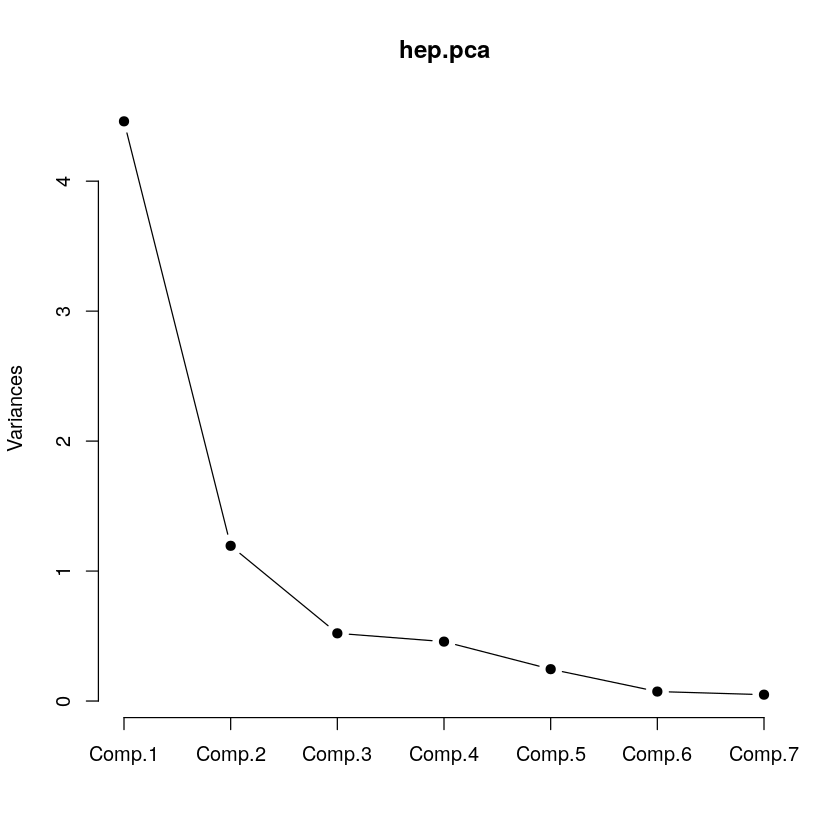

In [27]:
screeplot(hep.pca, type = "lines", pch = 19)

기울기가 급감한 부분 PC1, 2를 선택

In [28]:
hep.pca$loadings[, 1:2]

,Comp.1,Comp.2
hurdles,0.4528710,0.15792058
highjump,0.3771992,0.24807386
shot,0.3630725,-0.28940743
run200m,0.4078950,-0.26038545
longjump,0.4562318,0.05587394
javelin,0.0754090,-0.84169212
run800m,0.3749594,0.22448984


주성분 1, 2의 고유벡터(계수들의 벡터) 출력 <br>
표준화 되어 있기 때문에 계수들의 절대값 크기로 각 변수가 주성분에 얼마나 영향을 주는지 알 수 있다.

In [29]:
hep.pca$scores[, 1:2]

,Comp.1,Comp.2
Joyner-Kersee (USA),4.20643487,-1.26802363
John (GDR),2.94161870,-0.53452561
Behmer (GDR),2.70427114,-0.69275901
Sablovskaite (URS),1.37105209,-0.70655862
Choubenkova (URS),1.38704979,-1.78931718
Schulz (GDR),1.06537236,0.08104469
Fleming (AUS),1.12307639,0.33042906
Greiner (USA),0.94221015,0.82345074
Lajbnerova (CZE),0.54118484,-0.14933917
Bouraga (URS),0.77548704,0.53686251


주성분의 값을 볼 수 있다.

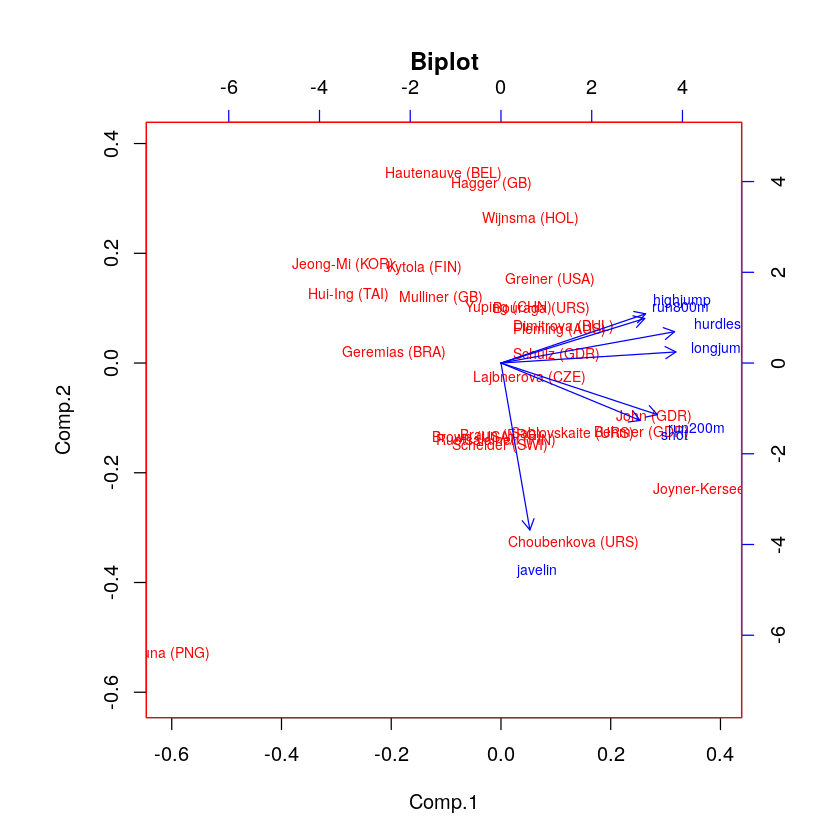

In [30]:
biplot(hep.pca, cex = 0.7, col = c("red", "blue"), main = "Biplot")

파란 그래프가 의미하는 것은 주성분의 loading(계수들)의 그래프이다. <br>
가까운 거리와 방향일 수록 변수의 상관관계가 짙다. <br>
붉은 그래프의 점이 파란 그래프의 변수와 가까울 수록 그 변수와 관련이 높다.

# 맥주 

In [31]:
library(xlsx)

In [32]:
beer = read.xlsx("mvadata/beer.xlsx", 1)

99명의 소비자를 대상으로 한 맥주 구매 설문 결과 <br>
가격, 크기, 도수, 평판, 색, 향, 맛

In [33]:
head(beer)

,cost,size,alcohol,reputat,color,aroma,taste
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,10,15,20,85,40,30,50
2,100,70,50,30,75,60,80
3,65,30,35,80,80,60,90
4,0,0,20,30,80,90,100
5,10,25,10,100,50,40,60
6,25,35,30,40,45,30,65


In [34]:
summary(beer)

      cost             size          alcohol         reputat      
 Min.   :  0.00   Min.   : 0.00   Min.   :10.00   Min.   : 30.00  
 1st Qu.: 10.00   1st Qu.:10.00   1st Qu.:15.00   1st Qu.: 30.00  
 Median : 15.00   Median :15.00   Median :20.00   Median : 40.00  
 Mean   : 27.78   Mean   :22.22   Mean   :23.89   Mean   : 55.56  
 3rd Qu.: 25.00   3rd Qu.:30.00   3rd Qu.:30.00   3rd Qu.: 80.00  
 Max.   :100.00   Max.   :70.00   Max.   :50.00   Max.   :100.00  
     color           aroma           taste       
 Min.   :40.00   Min.   :30.00   Min.   : 50.00  
 1st Qu.:50.00   1st Qu.:40.00   1st Qu.: 65.00  
 Median :60.00   Median :60.00   Median : 85.00  
 Mean   :63.89   Mean   :56.11   Mean   : 80.56  
 3rd Qu.:80.00   3rd Qu.:65.00   3rd Qu.: 95.00  
 Max.   :95.00   Max.   :90.00   Max.   :100.00  

In [35]:
round(cor(beer), 2)

,cost,size,alcohol,reputat,color,aroma,taste
cost,1.00,0.88,0.88,-0.17,0.32,-0.03,0.05
size,0.88,1.00,0.82,-0.06,0.01,-0.29,-0.31
alcohol,0.88,0.82,1.00,-0.36,0.40,0.10,0.06
reputat,-0.17,-0.06,-0.36,1.00,-0.52,-0.52,-0.63
color,0.32,0.01,0.40,-0.52,1.00,0.82,0.80
aroma,-0.03,-0.29,0.10,-0.52,0.82,1.00,0.87
taste,0.05,-0.31,0.06,-0.63,0.80,0.87,1.00
